In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Datasets/Economic_Index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [29]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [30]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

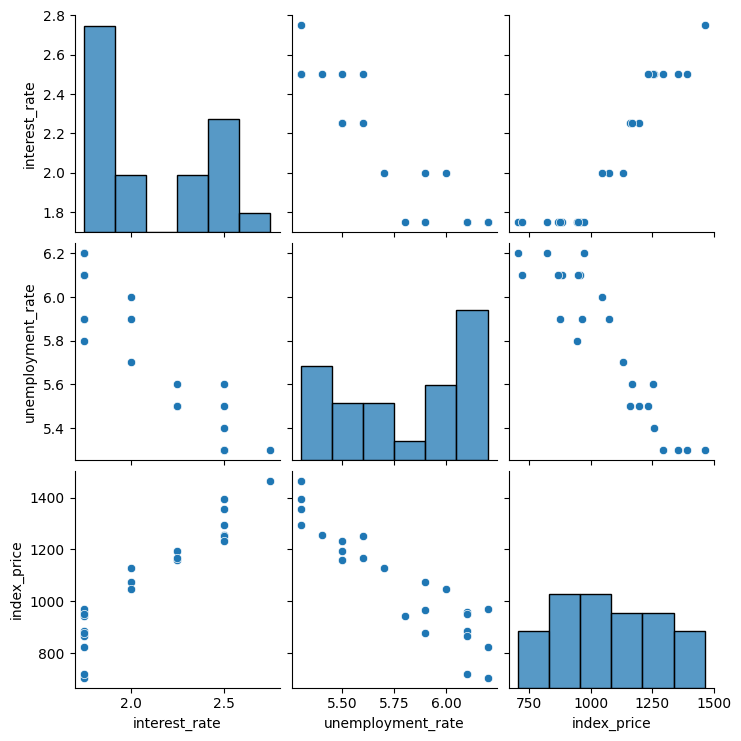

In [31]:
#visualisation
import seaborn as sns
sns.pairplot(df)

In [32]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


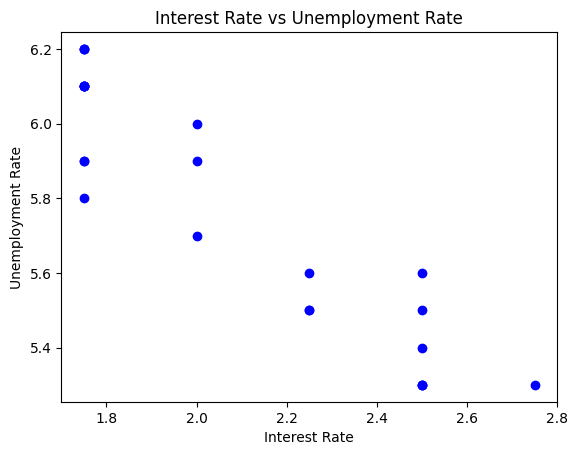

In [33]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='blue')
plt.title('Interest Rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [34]:
#independent and dependent variables
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [35]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
validation_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
print(validation_scores)
print("Mean R^2 score:", np.mean(validation_scores))


[0.88655981 0.82341664 0.85304513]
Mean R^2 score: 0.8543405270172677


In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 6957.105303258817
Root Mean Squared Error: 83.40926389351975
R^2 Score: 0.8254940547158579
Mean Absolute Error: 71.71878409976614


Text(0, 0.5, 'Predicted Values')

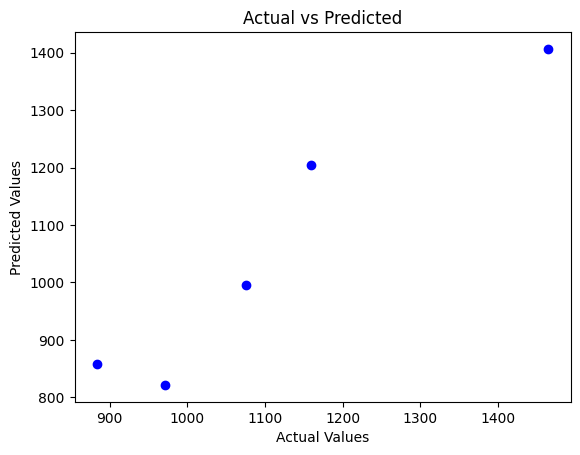

In [42]:
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Residuals Distribution')

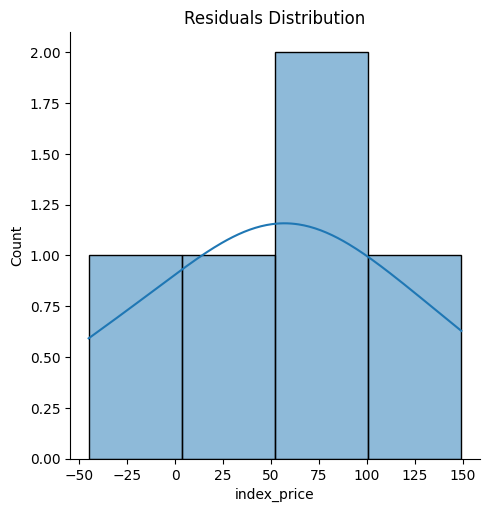

In [43]:
residuals = y_test - y_pred
sns.displot(residuals, kde=True)
plt.title('Residuals Distribution')

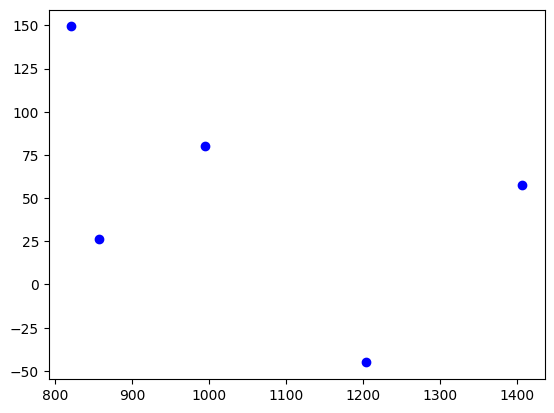

In [44]:
plt.scatter(y_pred, residuals,color='blue')

In [37]:
# import seaborn as sns
# sns.regplot(x=y_test, y=y_pred, color='blue')
# plt.xlabel('Actual Index Price')
# plt.ylabel('Predicted Index Price')
# plt.title('Actual vs Predicted Index Price')
# plt.show()